In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

pd.DataFrame(X_train_poly_scaled).head()


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587,-0.366263,-0.007155,...,0.138571,0.039009,0.615911,-0.729970,-0.010391,0.023047,-0.043835,-1.327542,1.352177,-1.264308
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162,-0.188607,1.054244,...,-0.113050,-0.038568,-0.155498,0.111568,-0.011239,-0.116782,0.117216,-0.871321,0.851631,-0.711595
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603,-0.064132,-1.225206,...,-0.175851,-0.035970,-0.471966,0.444195,-0.010888,-0.036370,0.030027,-0.477033,0.278996,0.439825
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698,-0.677564,-0.511253,...,-0.092987,0.003676,-0.105986,0.031780,-0.010205,0.045163,-0.069218,-1.336010,1.351330,-1.225353
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551,-0.275061,0.599099,...,-0.181031,-0.041989,-0.461171,0.485080,-0.011057,-0.058433,0.067364,0.503484,-0.431984,0.100020


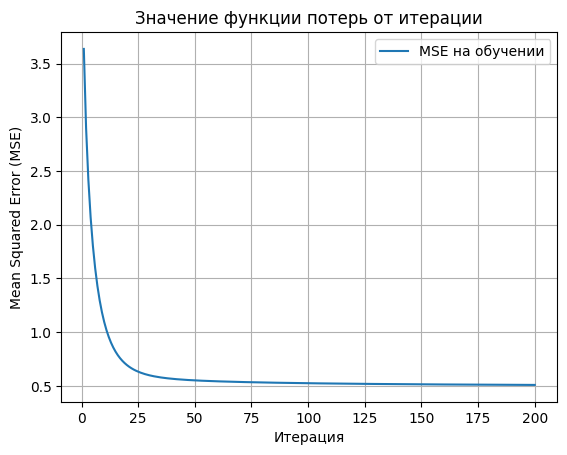

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(max_iter=1000, eta0=0.0001, learning_rate="invscaling", random_state=42)
losses = []

for i in range(1, 201):
    model.partial_fit(X_train_poly_scaled, y_train)
    y_pred_train = model.predict(X_train_poly_scaled)
    loss = mean_squared_error(y_train, y_pred_train)
    losses.append(loss)

plt.plot(range(1, 201), losses, label="MSE на обучении")
plt.xlabel("Итерация")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Значение функции потерь от итерации")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_poly_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


MAE: 0.53
MSE: 0.59
R^2 Score: 0.55


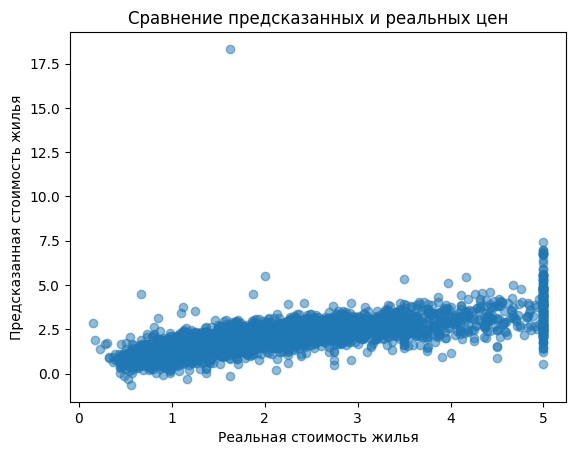

In [16]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальная стоимость жилья")
plt.ylabel("Предсказанная стоимость жилья")
plt.title("Сравнение предсказанных и реальных цен")
plt.show()
